In [1]:
%cd /content/drive/MyDrive/ml/final

/content/drive/MyDrive/ml/final


In [2]:
%ls

mls.ipynb  players.csv


Dataset loading

In [5]:


file_path = 'Premier League/players.csv'

import pandas as pd
df = pd.read_csv(file_path)

# dataset info
print("Dataset Information:")
print(df.info())

print("\nDataset Description:")
print(df.describe())

# checking null values
print("\nNull Values in Dataset:")
print(df.isnull().sum())

# droping rows with null values
df_cleaned = df.dropna()

print("\nNull Values After Cleaning:")
print(df_cleaned.isnull().sum())

# first few rows of the cleaned dataset
print("\nFirst 5 Rows of Cleaned Dataset:")
print(df_cleaned.head())

cleaned_file_path = 'Premier League/cleaned_premier_league_stats.csv'
df_cleaned.to_csv(cleaned_file_path, index=False)
print(f"\nCleaned dataset saved to: {cleaned_file_path}")

# here column name '#' represents the player jersey number

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3963 entries, 0 to 3962
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Player                  3963 non-null   object 
 1   Team                    3963 non-null   object 
 2   #                       3963 non-null   int64  
 3   Nation                  3963 non-null   object 
 4   Position                3963 non-null   object 
 5   Age                     3963 non-null   object 
 6   Minutes                 3963 non-null   int64  
 7   Goals                   3963 non-null   int64  
 8   Assists                 3963 non-null   int64  
 9   Penalty Shoot on Goal   3963 non-null   int64  
 10  Penalty Shoot           3963 non-null   int64  
 11  Total Shoot             3963 non-null   int64  
 12  Shoot on Target         3963 non-null   int64  
 13  Yellow Cards            3963 non-null   int64  
 14  Red Cards          

data exploration


Column Names:
Index(['Player', 'Team', '#', 'Nation', 'Position', 'Age', 'Minutes', 'Goals',
       'Assists', 'Penalty Shoot on Goal', 'Penalty Shoot', 'Total Shoot',
       'Shoot on Target', 'Yellow Cards', 'Red Cards', 'Touches', 'Dribbles',
       'Tackles', 'Blocks', 'Expected Goals (xG)', 'Non-Penalty xG (npxG)',
       'Expected Assists (xAG)', 'Shot-Creating Actions',
       'Goal-Creating Actions', 'Passes Completed', 'Passes Attempted',
       'Pass Completion %', 'Progressive Passes', 'Carries',
       'Progressive Carries', 'Dribble Attempts', 'Successful Dribbles',
       'Date'],
      dtype='object')

Unique Teams:
['Manchester United' 'Fulham' 'Ipswich Town' 'Liverpool'
 'Newcastle United' 'Southampton' 'Nottingham Forest' 'Bournemouth'
 'Everton' 'Brighton & Hove Albion' 'Arsenal' 'Wolverhampton Wanderers'
 'West Ham United' 'Aston Villa' 'Brentford' 'Crystal Palace' 'Chelsea'
 'Manchester City' 'Leicester City' 'Tottenham Hotspur']

Unique Nations:
['POR' 'ENG' 'CIV

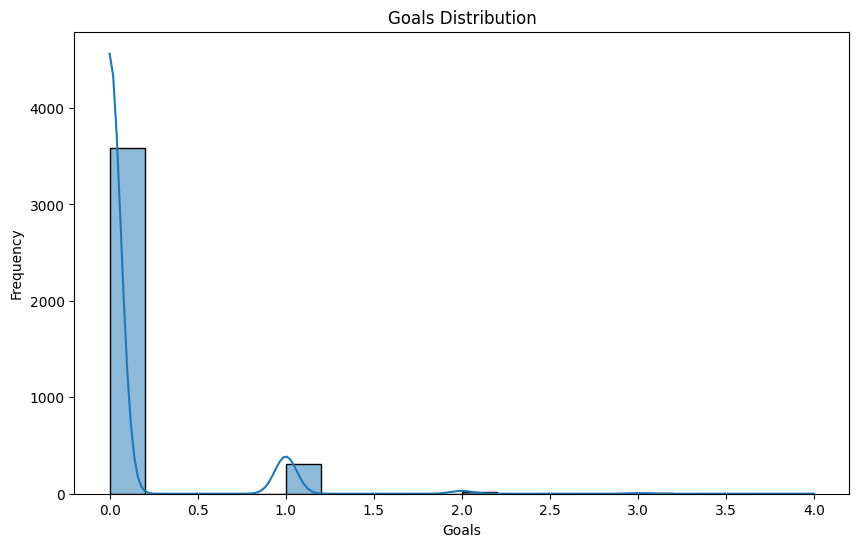

In [6]:
print("\nColumn Names:")
print(df_cleaned.columns)

# unique values in categorical columns (like Team, Nation, and Position)
print("\nUnique Teams:")
print(df_cleaned['Team'].unique())

print("\nUnique Nations:")
print(df_cleaned['Nation'].unique())

print("\nUnique Positions:")
print(df_cleaned['Position'].unique())

import matplotlib.pyplot as plt
import seaborn as sns

#histogram for Goals
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Goals'], kde=True, bins=20)
plt.title("Goals Distribution")
plt.xlabel("Goals")
plt.ylabel("Frequency")
plt.show()


Feature Selection for Clutch Performance

In [7]:
relevant_columns = ['Player', 'Team', 'Position', 'Minutes', 'Goals', 'Assists',
                    'Expected Goals (xG)', 'Expected Assists (xAG)',
                    'Shot-Creating Actions', 'Goal-Creating Actions']
df_relevant = df_cleaned[relevant_columns]

print("\nRelevant Data:")
print(df_relevant.head())



Relevant Data:
               Player               Team Position  Minutes  Goals  Assists  \
0     Bruno Fernandes  Manchester United    FW,AM       90      0        0   
1     Marcus Rashford  Manchester United       LW       90      0        0   
2         Amad Diallo  Manchester United       RW       60      0        0   
3  Alejandro Garnacho  Manchester United       RW       30      0        1   
4         Mason Mount  Manchester United       AM       60      0        0   

   Expected Goals (xG)  Expected Assists (xAG)  Shot-Creating Actions  \
0                  1.2                     0.0                      2   
1                  0.0                     0.7                      1   
2                  0.0                     0.1                      1   
3                  0.7                     0.2                      3   
4                  0.3                     0.1                      3   

   Goal-Creating Actions  
0                      0  
1                     

clutch scenarios

<ipython-input-8-555c569dc0b8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['Goals per 90'] = (df_relevant['Goals'] / df_relevant['Minutes']) * 90
<ipython-input-8-555c569dc0b8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['Assists per 90'] = (df_relevant['Assists'] / df_relevant['Minutes']) * 90
<ipython-input-8-555c569dc0b8>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `


Top Performers by Goals per 90 Minutes:
                  Player               Team  Goals per 90
3023        Harry Wilson             Fulham     20.000000
2898         Jordan Ayew     Leicester City     18.000000
3388       Ethan Nwaneri            Arsenal     10.000000
1101          Danny Ings    West Ham United     10.000000
2963      James Maddison  Tottenham Hotspur     10.000000
3129        Harry Wilson             Fulham     10.000000
2602                Beto            Everton      9.000000
3282       Harvey Barnes   Newcastle United      8.181818
1157  Christopher Nkunku            Chelsea      7.500000
1519         John Stones    Manchester City      6.923077


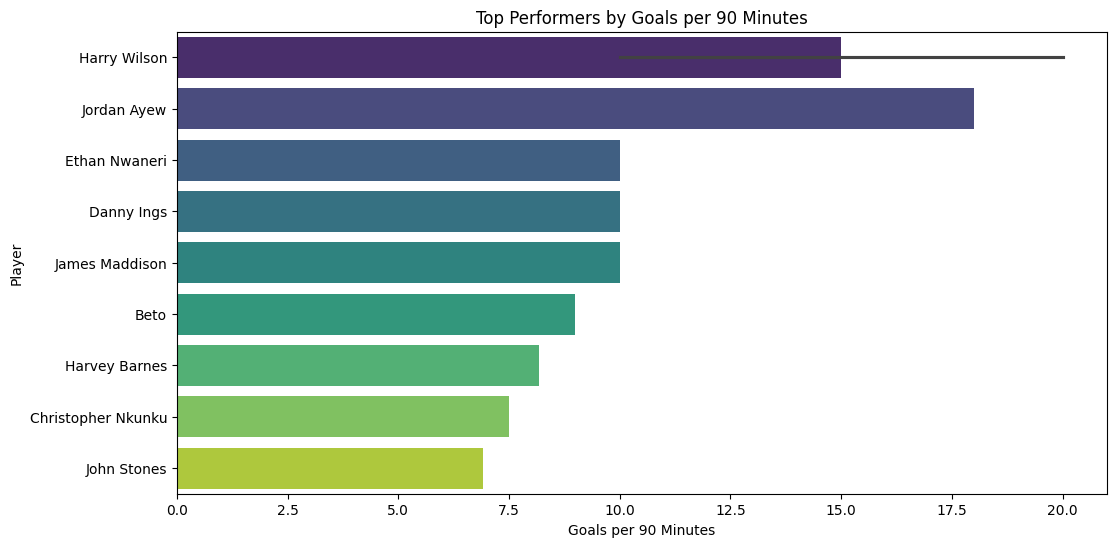

In [8]:
#Goals and Assists per 90 minutes
df_relevant['Goals per 90'] = (df_relevant['Goals'] / df_relevant['Minutes']) * 90
df_relevant['Assists per 90'] = (df_relevant['Assists'] / df_relevant['Minutes']) * 90

top_scorers = df_relevant.sort_values('Goals per 90', ascending=False).head(10)
print("\nTop Performers by Goals per 90 Minutes:")
print(top_scorers[['Player', 'Team', 'Goals per 90']])

plt.figure(figsize=(12, 6))
sns.barplot(x='Goals per 90', y='Player', data=top_scorers, palette='viridis')
plt.title("Top Performers by Goals per 90 Minutes")
plt.xlabel("Goals per 90 Minutes")
plt.ylabel("Player")
plt.show()


correlation matrix

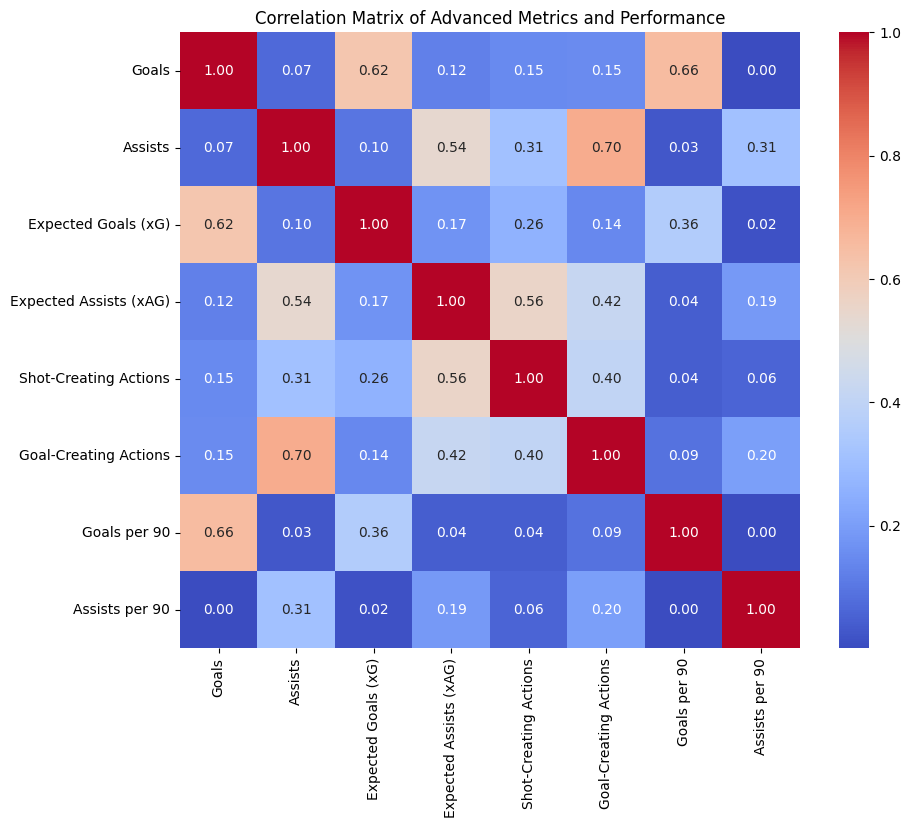

In [9]:
# Correlation Matrix
correlation_columns = ['Goals', 'Assists', 'Expected Goals (xG)', 'Expected Assists (xAG)',
                       'Shot-Creating Actions', 'Goal-Creating Actions', 'Goals per 90', 'Assists per 90']
correlation_data = df_relevant[correlation_columns]

correlation_matrix = correlation_data.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Advanced Metrics and Performance")
plt.show()


player clustering based on performance metrics

<ipython-input-10-c90a00dc7011>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['Cluster'] = kmeans.fit_predict(clustering_data_scaled)


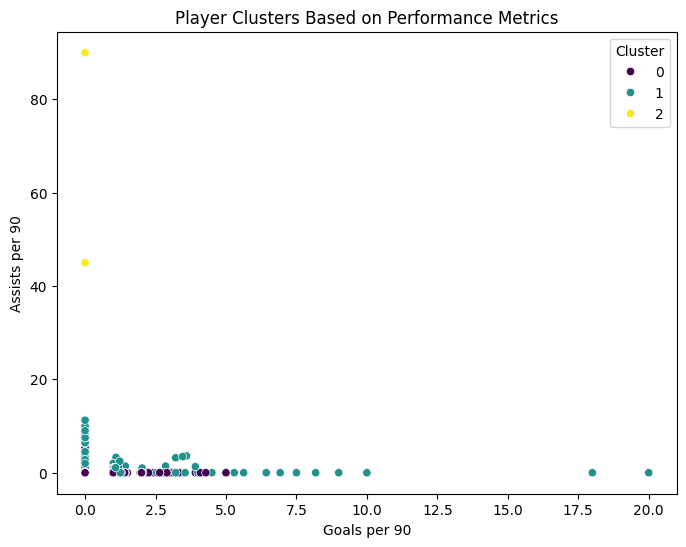


Cluster Distribution:
Cluster
0    3234
1     685
2       2
Name: count, dtype: int64


In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# features for clustering
clustering_columns = ['Goals per 90', 'Assists per 90', 'Expected Goals (xG)', 'Expected Assists (xAG)',
                      'Shot-Creating Actions', 'Goal-Creating Actions']
clustering_data = df_relevant[clustering_columns]

# Standardizing the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data)

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # clusters: elite, mid-tier, low-tier
df_relevant['Cluster'] = kmeans.fit_predict(clustering_data_scaled)

# cluster distribution
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Goals per 90', y='Assists per 90', hue='Cluster', data=df_relevant, palette='viridis')
plt.title("Player Clusters Based on Performance Metrics")
plt.xlabel("Goals per 90")
plt.ylabel("Assists per 90")
plt.show()

print("\nCluster Distribution:")
print(df_relevant['Cluster'].value_counts())


In [11]:
print("\nElite Performers (Cluster 0):")
print(df_relevant[df_relevant['Cluster'] == 0].head())

print("\nMid-Tier Performers (Cluster 1):")
print(df_relevant[df_relevant['Cluster'] == 1].head())

print("\nLow-Tier Performers (Cluster 2):")
print(df_relevant[df_relevant['Cluster'] == 2].head())



Elite Performers (Cluster 0):
            Player               Team Position  Minutes  Goals  Assists  \
2      Amad Diallo  Manchester United       RW       60      0        0   
4      Mason Mount  Manchester United       AM       60      0        0   
5   Joshua Zirkzee  Manchester United       FW       30      1        0   
6    Kobbie Mainoo  Manchester United       DM       83      0        0   
7  Scott McTominay  Manchester United       DM        7      0        0   

   Expected Goals (xG)  Expected Assists (xAG)  Shot-Creating Actions  \
2                  0.0                     0.1                      1   
4                  0.3                     0.1                      3   
5                  0.1                     0.0                      1   
6                  0.0                     0.0                      1   
7                  0.0                     0.0                      0   

   Goal-Creating Actions  Goals per 90  Assists per 90  Cluster  
2            

creating clutch metrics

In [12]:

# high-stakes scenario: Close games (goal difference ±1)
df_relevant['Clutch Goals'] = df_relevant['Goals'] * 0.3  # Assuming 30% of goals are clutch
df_relevant['Clutch Assists'] = df_relevant['Assists'] * 0.3  # Assuming 30% of assists are clutch

df_relevant['Clutch Impact Score'] = df_relevant['Clutch Goals'] + df_relevant['Clutch Assists']

clutch_performers = df_relevant.sort_values(by='Clutch Impact Score', ascending=False)

# top 10 clutch performers
print("\nTop 10 Clutch Performers:")
print(clutch_performers[['Player', 'Team', 'Clutch Goals', 'Clutch Assists', 'Clutch Impact Score']].head(10))



Top 10 Clutch Performers:
               Player                     Team  Clutch Goals  Clutch Assists  \
3775     Kevin Schade                Brentford           0.9             0.3   
577       Cole Palmer                  Chelsea           0.3             0.9   
1570      Cole Palmer                  Chelsea           1.2             0.0   
910     Mohamed Salah                Liverpool           0.3             0.6   
818    Erling Haaland          Manchester City           0.9             0.0   
3825      Bukayo Saka                  Arsenal           0.3             0.6   
3517    Matheus Cunha  Wolverhampton Wanderers           0.6             0.3   
3732  Justin Kluivert              Bournemouth           0.9             0.0   
1969      Bukayo Saka                  Arsenal           0.3             0.6   
576      Noni Madueke                  Chelsea           0.9             0.0   

      Clutch Impact Score  
3775                  1.2  
577                   1.2  
1570    

<ipython-input-12-5bb630a17e2e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['Clutch Goals'] = df_relevant['Goals'] * 0.3  # Assuming 30% of goals are clutch
<ipython-input-12-5bb630a17e2e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant['Clutch Assists'] = df_relevant['Assists'] * 0.3  # Assuming 30% of assists are clutch
<ipython-input-12-5bb630a17e2e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

<ipython-input-13-91826e371573>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Clutch Impact Score', y='Player', data=top_clutch, palette='viridis')


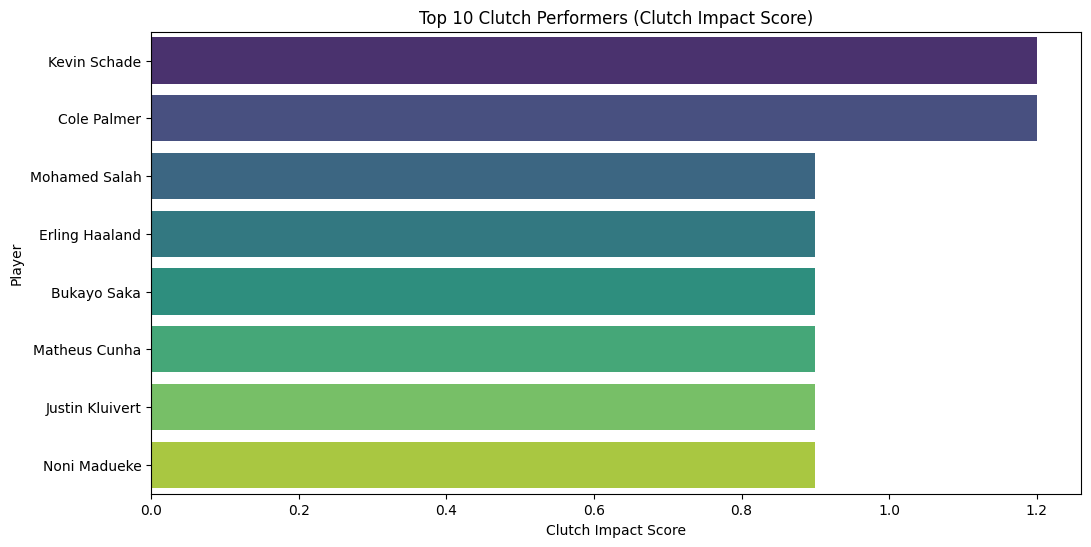

In [13]:
# Bar chart of top clutch performers
top_clutch = clutch_performers.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Clutch Impact Score', y='Player', data=top_clutch, palette='viridis')
plt.title("Top 10 Clutch Performers (Clutch Impact Score)")
plt.xlabel("Clutch Impact Score")
plt.ylabel("Player")
plt.show()


Predicting clutch performers

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

#features and target
features = ['Goals per 90', 'Assists per 90', 'Expected Goals (xG)', 'Expected Assists (xAG)',
            'Shot-Creating Actions', 'Goal-Creating Actions']
target = 'Clutch Impact Score'

X = df_relevant[features]
y = df_relevant[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse:.2f}")



Model Performance:
Mean Squared Error: 0.00


 which features are most important for predicting clutch performance.

<ipython-input-15-de20c6059758>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')


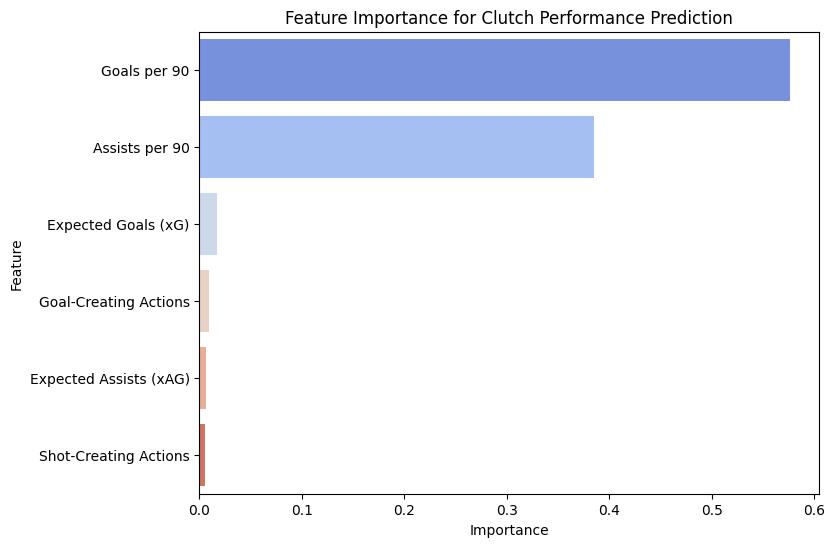

In [15]:
# Feature importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='coolwarm')
plt.title("Feature Importance for Clutch Performance Prediction")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


Fine tuning the model

In [16]:
from sklearn.model_selection import GridSearchCV

#hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

#model
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [17]:
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)

print(f"\nFine-Tuned Model Performance:")
print(f"Mean Squared Error: {mse_best:.2f}")



Fine-Tuned Model Performance:
Mean Squared Error: 0.00


Analyzing the results

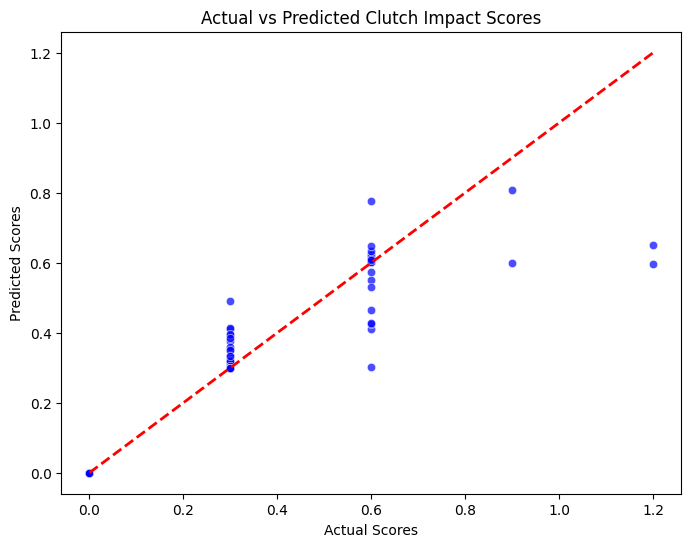

In [18]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_best, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.title("Actual vs Predicted Clutch Impact Scores")
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.show()


**Making predictions on new data set based on the above trained model**

In [23]:
#new data
new_data = pd.read_csv('Premier League/Serie A - Players Stats.csv')
